<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.271155,78.694364,-0.081774,142.883745,142.957542,-0.073797
1,0.0,1.0,64.565882,40.369761,0.105670,115.041313,114.937856,0.103457
2,0.0,2.0,69.306562,86.305462,-0.052837,165.559187,165.603078,-0.043891
3,0.0,3.0,21.302989,58.325863,-0.036356,89.592497,89.623917,-0.031420
4,0.0,4.0,31.102128,49.787812,0.110305,91.000244,90.887738,0.112507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.210337,27.710832,-0.060125,109.861043,109.910860,-0.049818
119996,999.0,116.0,77.466960,66.660434,0.100968,154.228362,154.117047,0.111315
119997,999.0,117.0,56.338125,55.183221,-0.319389,121.201957,121.516569,-0.314612
119998,999.0,118.0,86.607769,26.474698,0.198354,123.280821,123.068026,0.212795


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.271155  78.694364 -0.081774  142.883745  142.957542 -0.073797
      1.0    64.565882  40.369761  0.105670  115.041313  114.937856  0.103457
      2.0    69.306562  86.305462 -0.052837  165.559187  165.603078 -0.043891
      3.0    21.302989  58.325863 -0.036356   89.592497   89.623917 -0.031420
      4.0    31.102128  49.787812  0.110305   91.000244   90.887738  0.112507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  72.210337  27.710832 -0.060125  109.861043  109.910860 -0.049818
      116.0  77.466960  66.660434  0.100968  154.228362  154.117047  0.111315
      117.0  56.338125  55.183221 -0.319389  121.201957  121.516569 -0.314612
      118.0  86.607769  26.474698  0.198354  123.280821  123.068026  0.212795
      119.0  69.561792  39.131138  0.034418  118.727348  118.683800  0.043548

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.271155  78.694364 -0.081774  142.883745  142.957542 -0.073797
      1.0    64.565882  40.369761  0.105670  115.041313  114.937856  0.103457
      2.0    69.306562  86.305462 -0.052837  165.559187  165.603078 -0.043891
      3.0    21.302989  58.325863 -0.036356   89.592497   89.623917 -0.031420
      4.0    31.102128  49.787812  0.110305   91.000244   90.887738  0.112507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  72.210337  27.710832 -0.060125  109.861043  109.910860 -0.049818
      116.0  77.466960  66.660434  0.100968  154.228362  154.117047  0.111315
      117.0  56.338125  55.183221 -0.319389  121.201957  121.516569 -0.314612
      118.0  86.607769  26.474698  0.198354  123.280821  123.068026  0.212795
      119.0  69.561792  39.131138  0.034418  118.727348  118.683800  0.043548

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.271155,78.694364,-0.081774,142.883745,142.957542,-0.073797
1,0.0,1.0,64.565882,40.369761,0.105670,115.041313,114.937856,0.103457
2,0.0,2.0,69.306562,86.305462,-0.052837,165.559187,165.603078,-0.043891
3,0.0,3.0,21.302989,58.325863,-0.036356,89.592497,89.623917,-0.031420
4,0.0,4.0,31.102128,49.787812,0.110305,91.000244,90.887738,0.112507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.210337,27.710832,-0.060125,109.861043,109.910860,-0.049818
119996,999.0,116.0,77.466960,66.660434,0.100968,154.228362,154.117047,0.111315
119997,999.0,117.0,56.338125,55.183221,-0.319389,121.201957,121.516569,-0.314612
119998,999.0,118.0,86.607769,26.474698,0.198354,123.280821,123.068026,0.212795


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.271155  78.694364 -0.081774  142.883745  142.957542 -0.073797
      1.0    64.565882  40.369761  0.105670  115.041313  114.937856  0.103457
      2.0    69.306562  86.305462 -0.052837  165.559187  165.603078 -0.043891
      3.0    21.302989  58.325863 -0.036356   89.592497   89.623917 -0.031420
      4.0    31.102128  49.787812  0.110305   91.000244   90.887738  0.112507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  72.210337  27.710832 -0.060125  109.861043  109.910860 -0.049818
      116.0  77.466960  66.660434  0.100968  154.228362  154.117047  0.111315
      117.0  56.338125  55.183221 -0.319389  121.201957  121.516569 -0.314612
      118.0  86.607769  26.474698  0.198354  123.280821  123.068026  0.212795
      119.0  69.561792  39.131138  0.034418  118.727348  118.683800  0.043548

[120000 rows x 6 columns]

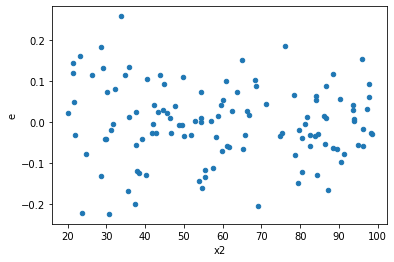

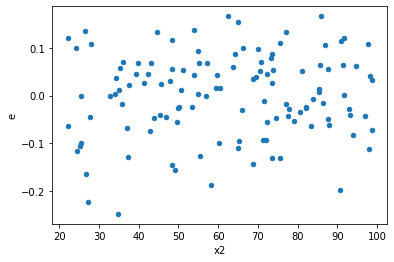

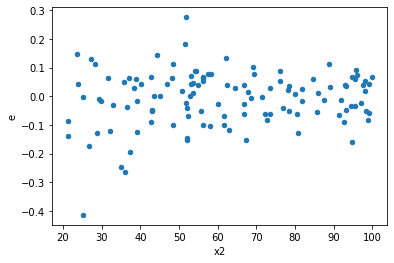

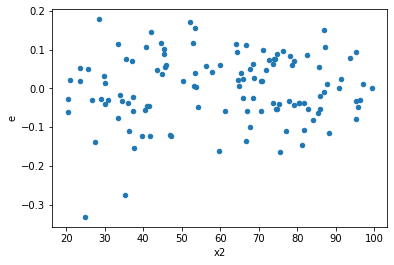

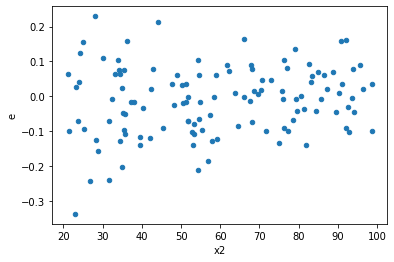

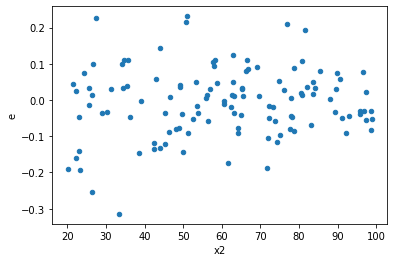

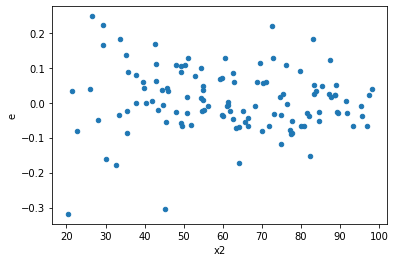

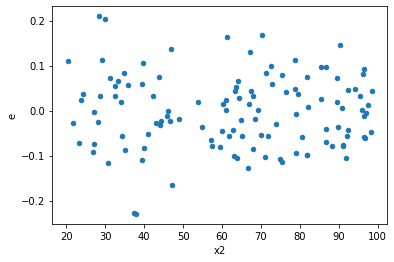

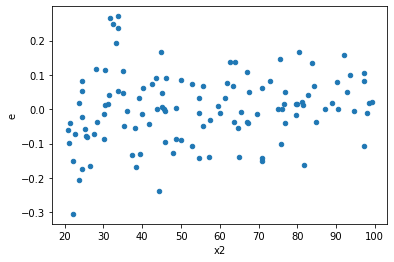

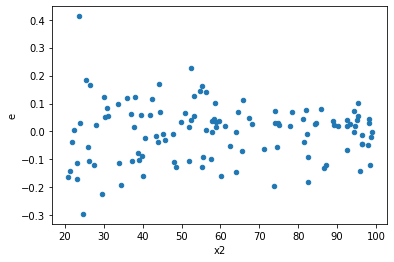

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,56.0,60.0,0.3728547339260451,0.612077911058484,0.0066581202486793774,0.0102012985176414,1.5321589482654363,0.10572950387184177,0.9471352480640791,0.052864751935920884,Reject001=1 : Homoscedasticity
2.0,54.0,62.0,0.23541459782981888,0.7830369778007632,0.0043595295894410906,0.012629628674205858,2.897016390207602,6.703246256312134e-05,0.9999664837687184,3.351623128156067e-05,Reject001=0 : Heteroscedasticity
7.0,38.0,78.0,0.1624459963737024,0.5968234422600935,0.004274894641413222,0.007651582593078123,1.7898879937187444,0.030710270074899793,0.9846448649625501,0.015355135037449896,Reject001=1 : Homoscedasticity
8.0,60.0,56.0,0.4729246012321069,0.6967511610375423,0.007882076687201782,0.012441985018527542,1.5785161084171808,0.08636720197495906,0.9568163990125205,0.04318360098747953,Reject001=1 : Homoscedasticity
10.0,70.0,46.0,0.5214701848979313,0.46888557477797904,0.007449574069970447,0.0101931646690865,1.368288250220316,0.25851850827665634,0.8707407458616718,0.12925925413832817,Reject001=1 : Homoscedasticity
11.0,57.0,59.0,0.4999238020549595,0.8168809111263821,0.008770593018508062,0.013845439171633594,1.5786206408638943,0.08414746447262988,0.9579262677636851,0.04207373223631494,Reject001=1 : Homoscedasticity
15.0,58.0,58.0,0.3377453960504347,0.689415643003382,0.0058231964836281845,0.011886476603506587,2.0412288400237237,0.007413925014981171,0.9962930374925094,0.0037069625074905854,Reject001=0 : Heteroscedasticity
16.0,50.0,66.0,0.288415973418597,0.6613626755878128,0.005768319468371939,0.010020646599815346,1.7371864812202558,0.035781997800495846,0.9821090010997521,0.017890998900247923,Reject001=1 : Homoscedasticity
17.0,68.0,48.0,0.3388431799154528,0.5137578250218657,0.00498298793993313,0.01070328802128887,2.1479658691352372,0.00598707273089949,0.9970064636345503,0.002993536365449745,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,56.0,60.0,0.3728547339260451,0.612077911058484,0.0066581202486793774,0.0102012985176414,1.5321589482654363,0.10572950387184177,Reject001=1 : Homoscedasticity
1.0,55.0,61.0,0.42967346643179044,0.46068438957866154,0.0078122448442143715,0.007552203107846911,0.9667135706121598,0.9016352512926593,Reject001=1 : Homoscedasticity
2.0,54.0,62.0,0.23541459782981888,0.7830369778007632,0.0043595295894410906,0.012629628674205858,2.897016390207602,6.703246256312134e-05,Reject001=0 : Heteroscedasticity
3.0,60.0,56.0,0.5440803912756124,0.3538139689252414,0.009068006521260207,0.00631810658795074,0.696747027380026,0.1702672674143708,Reject001=1 : Homoscedasticity
4.0,70.0,46.0,0.8423519004472152,0.23810658846475752,0.01203359857781736,0.005176230184016467,0.4301481514896375,0.0014042568594063378,Reject001=0 : Heteroscedasticity
5.0,55.0,61.0,0.6507667243236196,0.3494487947682382,0.011832122260429448,0.005728668766692429,0.4841624047319899,0.007007935743451224,Reject001=0 : Heteroscedasticity
6.0,57.0,59.0,0.4566878460404381,0.37400349035943825,0.00801206747439365,0.006339042209482004,0.7911868228445916,0.37626164467082074,Reject001=1 : Homoscedasticity
7.0,38.0,78.0,0.1624459963737024,0.5968234422600935,0.004274894641413222,0.007651582593078123,1.7898879937187444,0.030710270074899793,Reject001=1 : Homoscedasticity
8.0,60.0,56.0,0.4729246012321069,0.6967511610375423,0.007882076687201782,0.012441985018527542,1.5785161084171808,0.08636720197495906,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      581
Reject001=0 : Heteroscedasticity    419
Name: Result_test, dtype: int64